# DECISION TREE HYPER-PARAMETERS. TUNING DECISION TREES

- ** max_depth : int or None, optional (default=None)**
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Ignored if max_leaf_nodes is not None.
    
- **min_samples_split : int, optional (default=2)**
    The minimum number of samples required to split an internal node.

- There are more hyper-parameters: 
  - help("sklearn.tree.DecisionTreeRegressor")
  - help("sklearn.tree.DecisionTreeClassifier")



In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
from sklearn import tree
from scipy.stats import sem
from sklearn.cross_validation import cross_val_score, KFold

boston = load_boston()
X = boston.data
y = boston.target

np.random.seed(0)
cv = KFold(X.shape[0], 10, shuffle=True, random_state=0)


**Let's see what happens if we change max_depth parameter **

Max_depth=2 :Mean score: 30.049 (+/-3.252)
Max_depth=4 :Mean score: 26.110 (+/-5.819)
Max_depth=6 :Mean score: 24.863 (+/-5.072)
Max_depth=8 :Mean score: 25.728 (+/-6.603)
Max_depth=10 :Mean score: 24.215 (+/-6.103)
Max_depth=12 :Mean score: 24.565 (+/-6.078)
Max_depth=14 :Mean score: 24.701 (+/-5.942)


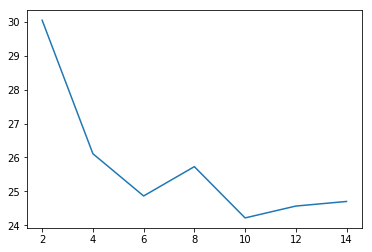

In [4]:
#for max_depth in [2,4,6,8,10,12,14,16]:
np.random.seed(0)
mds = range(2,16,2)
results = []
for max_depth in mds:
  clf = tree.DecisionTreeRegressor(max_depth=max_depth)
  scores = -cross_val_score(clf, 
                            X, y, 
                            scoring='neg_mean_squared_error', 
                            cv = cv)
    
  results.append(scores.mean())
  print ("Max_depth={0:d} :Mean score: {1:.3f} (+/-{2:.3f})").format(max_depth, scores.mean(), sem(scores))

plt.plot(np.array(mds,dtype=float),  results)
plt.show()

** We can see that the minimum value is obtained at max_depth = 10, so we should set the hyper-parameter to this value. However, it is important to see that if the random seed is changed from 0 to other values (try it by changing x in np.seed(x)), slightly different plots (and minima) are obtained, because the algorithm that builds decision trees is stochastic. **

** Let's see now what happens if we change the other hyperparameter: min_samples_split hyper-parameter **

min_samples_split=2 :Mean score: 23.285 (+/-4.464)
min_samples_split=4 :Mean score: 23.619 (+/-4.669)
min_samples_split=6 :Mean score: 23.926 (+/-5.305)
min_samples_split=8 :Mean score: 23.973 (+/-4.911)
min_samples_split=10 :Mean score: 23.808 (+/-5.028)
min_samples_split=12 :Mean score: 22.729 (+/-4.848)
min_samples_split=14 :Mean score: 21.189 (+/-4.872)
min_samples_split=16 :Mean score: 21.177 (+/-4.961)
min_samples_split=18 :Mean score: 20.923 (+/-4.917)
min_samples_split=20 :Mean score: 20.824 (+/-4.877)
min_samples_split=22 :Mean score: 20.625 (+/-4.738)
min_samples_split=24 :Mean score: 20.883 (+/-4.691)
min_samples_split=26 :Mean score: 20.689 (+/-4.939)
min_samples_split=28 :Mean score: 19.881 (+/-4.770)
min_samples_split=30 :Mean score: 20.397 (+/-4.734)
min_samples_split=32 :Mean score: 21.200 (+/-4.826)


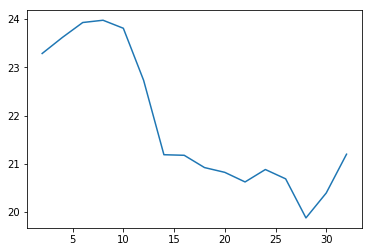

In [5]:
np.random.seed(0)  
mds = range(2,34,2)
results = []
for min_samples_split in mds:
  clf = tree.DecisionTreeRegressor(min_samples_split=min_samples_split)
  scores = -cross_val_score(clf, 
                            X, y, 
                            scoring='neg_mean_squared_error', 
                            cv = cv)
    
  results.append(scores.mean())
  print ("min_samples_split={0:d} :Mean score: {1:.3f} (+/-{2:.3f})").format(min_samples_split, scores.mean(), sem(scores))

plt.plot(np.array(mds,dtype=float),  results)
plt.show()

**The minimum for min_samples_split is obtained at 28, but this could change slightly if the random seed is altered, because decision tree construction is an stochastic process.**

# GRID SEARCH
**What if we want to find the best combination of hyper-parameters? (and not individual parameters as we did above). The process that performs a crossvalidation for all possible combinations of two (or more) hyper-parameters is called *grid-search* **

Note: in priciple, n_jobs can be used to run the process in parallel. In practive, in Windows it does not work well.

In [17]:
from sklearn.grid_search import GridSearchCV
np.random.seed(0)
param_grid = {'max_depth': range(2,16,2),
              'min_samples_split': range(2,34,2)}

clf = GridSearchCV(tree.DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=5 , n_jobs=1, verbose=1)
%time _ = clf.fit(X,y)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
Wall time: 2.08 s


[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:    2.0s finished


** Let's see the best hyper-parameters**

In [7]:
clf.best_params_, clf.best_score_

({'max_depth': 4, 'min_samples_split': 26}, -34.70844923772647)

**The best model fit with the best hyper-parameters and the whole training set can be used to make predictions:**

In [8]:
predictions = clf.predict(X)
print predictions[0:11]

[ 27.42727273  21.62974359  32.74878049  32.74878049  32.74878049
  21.62974359  21.62974359  19.73846154  19.73846154  19.73846154
  19.73846154]


** Using Randomized Search instead of a systematic search**

In [16]:
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint
np.random.seed(0)

param_dist = {'max_depth': sp_randint(2,16),
              'min_samples_split': sp_randint(2,16)}

n_iter_search = 20
clfrs = RandomizedSearchCV(tree.DecisionTreeRegressor(), 
                                   param_distributions=param_dist,
                                   scoring='neg_mean_squared_error',
                                   cv=5 , n_jobs=1, verbose=1,
                                   n_iter=n_iter_search)
clfrs.fit(X,y)
clfrs.grid_scores_.sort()
for line in clfrs.grid_scores_[0:11]:
    print(line)
    
clfrs.best_params_, clfrs.best_score_



Fitting 5 folds for each of 20 candidates, totalling 100 fits
mean: -41.58862, std: 17.32399, params: {'min_samples_split': 4, 'max_depth': 2}
mean: -36.24646, std: 13.40083, params: {'min_samples_split': 9, 'max_depth': 3}
mean: -36.44100, std: 18.22738, params: {'min_samples_split': 5, 'max_depth': 5}
mean: -38.88728, std: 20.48996, params: {'min_samples_split': 5, 'max_depth': 6}
mean: -38.06172, std: 17.76539, params: {'min_samples_split': 6, 'max_depth': 6}
mean: -38.43118, std: 18.68603, params: {'min_samples_split': 7, 'max_depth': 6}
mean: -36.29114, std: 16.77858, params: {'min_samples_split': 11, 'max_depth': 6}
mean: -40.56475, std: 21.21766, params: {'min_samples_split': 2, 'max_depth': 7}
mean: -39.13675, std: 22.80748, params: {'min_samples_split': 2, 'max_depth': 7}
mean: -38.54583, std: 18.93115, params: {'min_samples_split': 11, 'max_depth': 7}
mean: -37.54859, std: 16.76227, params: {'min_samples_split': 10, 'max_depth': 9}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


({'max_depth': 3, 'min_samples_split': 9}, -36.2464564151288)

# COMBINING HYPER-PARAMETER TUNING AND MODEL EVALUATION

Both grid search and randomized search do: 1) evaluate different models (trained with different hyper-parameters) by means of k-fold crossvalidation 2) then select the model with the top score 3) then train a final model with the best hyper-parameters and the whole dataset. This is the model stored in clf. But, what is the expected future performance of this model? We would need to test clf on a test set, or use crossvalidation. The latter is shown in the next cell. Pleae, notice that now GridSearchCV is called 10 times, once per crossvalidation iteration. In each crossvalidation iteration, hyper-parameters might actually be different. GridSearchCV also uses a crossvalidation for selecting the best hyper-parameters, but it is a different crossvalidation. In fact, what we have is two nested crossvalidation processes: the external one is for model evaluation, the internal one is for hyper-parameter selection. Think about it! 

In [18]:
from sklearn.grid_search import GridSearchCV
param_grid = {'max_depth': range(2,16,2),
              'min_samples_split': range(2,16,2)}

np.random.seed(0)
clf = GridSearchCV(tree.DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=5 , n_jobs=1, verbose=1)

cv = KFold(X.shape[0], 10, shuffle=True, random_state=0)
scores = -cross_val_score(clf, 
                            X, y, 
                            scoring='neg_mean_squared_error', 
                            cv = cv)


Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.7s finished


Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.6s finished


Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.6s finished


Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.7s finished


Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.6s finished


Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.7s finished


Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.7s finished


Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.7s finished


Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.7s finished


Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.7s finished


The expected performance of the model is (mean squared error):

In [19]:
scores.mean()

23.979412674551263

But we still have to train the final model with the complete dataset.

In [20]:
np.random.seed(0)
clfFinal = GridSearchCV(tree.DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=5 , n_jobs=1, verbose=1)
print(clfFinal.fit(X,y))

Fitting 5 folds for each of 49 candidates, totalling 245 fits
GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 4, 6, 8, 10, 12, 14], 'max_depth': [2, 4, 6, 8, 10, 12, 14]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=1)


[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.8s finished
